In [148]:
import numpy as np
import random

In [149]:
def sample_gmm_2d(K, C, N):
    X = np.zeros((K*N, 2), dtype=float)
    Y = np.zeros((K*N), dtype=float)
    for i in range(K):
        mean = np.random.uniform(-10, 10)
        sigma = np.random.uniform(0, 5)
        c_i = random.sample(range(C), 1)
        for j in range(N):
            X[i*N+j] = np.random.uniform(mean, sigma, 2)
            Y[i*N+j] = c_i[0]
    return (X, Y)

In [150]:
(X, Y) = sample_gmm_2d(4, 2, 30)
print(Y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [151]:
import matplotlib
import matplotlib.pyplot as plt

def graph_data(X, Y_, Y):
    X_correct_0 = X[np.logical_and(Y == Y_, Y_ == np.zeros(Y_.shape)), :]
    X_correct_1 = X[np.logical_and(Y == Y_, Y_ == np.ones(Y_.shape)), :]
    X_wrong_0 = X[np.logical_and(Y != Y_, Y_ == np.zeros(Y_.shape)), :]
    X_wrong_1 = X[np.logical_and(Y != Y_, Y_ == np.ones(Y_.shape)), :]
    plt.scatter(X_correct_0[:, 0], X_correct_0[:, 1], marker='o', c='gray')
    plt.scatter(X_correct_1[:, 0], X_correct_1[:, 1], marker='o', c='white')
    plt.scatter(X_wrong_0[:, 0], X_wrong_0[:, 1], marker='s', c='gray')
    plt.scatter(X_wrong_1[:, 0], X_wrong_1[:, 1], marker='s', c='white')

In [152]:
def myDummyDecision(X):
    score = X[:,0] + X[:,1] - 5
    return score

(array([-6.55347129, -6.86077738]), array([ 9.19364258,  9.18566152]))


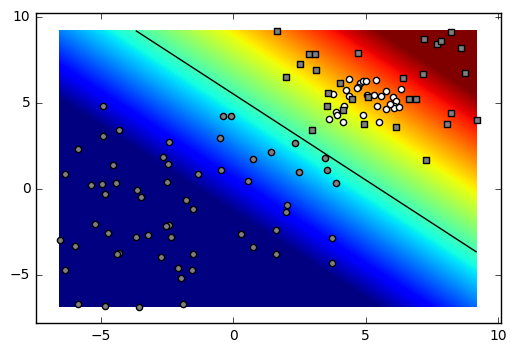

In [153]:
def graph_surface(fun, rect, offset=0.0, width=1000, height=1000):
    x1 = np.linspace(rect[0][0], rect[1][0], height)
    x2 = np.linspace(rect[0][1], rect[1][1], width)
    xx, yy = np.meshgrid(x1, x2)
    h = fun(np.stack([xx.flatten(), yy.flatten()], axis=1))
    h = h.reshape(xx.shape)
    plt.contour(xx, yy, h, colors='black', levels=[offset])
    norm = matplotlib.colors.Normalize(vmin=offset+2*min(rect[0][0], rect[0][1]),vmax=offset+2*max(rect[1][0], rect[1][1]))
    plt.pcolormesh(xx, yy, h, norm=norm)
    graph_data(X, Y, fun(X) > offset)
    plt.show()

bbox = (np.min(X, axis=0), np.max(X, axis=0))
print(bbox)
graph_surface(myDummyDecision, bbox, offset=0.5)